# VGG Net 응용

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [2]:
vgg16 = VGG16()
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19 = VGG19()
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving cat2.jpg to cat2 (1).jpg


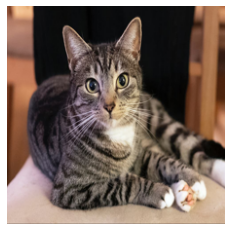

In [5]:
import matplotlib.pyplot as plt

img = Image.open('cat2.jpg').resize((224,224))
plt.imshow(img), plt.axis('off');

In [6]:
# 이미지 사이즈 변경 : resize
# img = np.array(img.resize((224, 224)))

### 이미지 예측

In [7]:
# predict() : 여러 건의 데이터 입력 必
yhat = vgg16.predict(np.array(img).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
yhat, label 

(array([[1.32205036e-09, 9.01309427e-09, 1.68259007e-08, 3.90730648e-08,
         4.23538937e-09, 5.05181008e-09, 1.41513121e-10, 2.74178653e-08,
         6.26651131e-09, 4.26709973e-10, 1.34816136e-09, 3.28580080e-10,
         4.60118414e-08, 1.01466915e-08, 2.64250888e-09, 1.35737679e-07,
         2.93094526e-08, 4.82809924e-07, 6.83937618e-09, 3.69853614e-09,
         1.74646591e-08, 2.22915020e-08, 6.75694611e-10, 3.54550211e-09,
         5.48102719e-07, 4.84469187e-10, 7.28404448e-10, 3.30092675e-10,
         1.85198523e-09, 5.67251934e-09, 3.71646935e-09, 2.37121567e-09,
         6.64899302e-10, 7.59951713e-10, 1.38833001e-09, 3.07501424e-09,
         2.92383202e-08, 5.19587644e-08, 1.61213620e-08, 7.60322223e-08,
         1.26105277e-08, 1.90244300e-08, 1.58629698e-09, 3.08319525e-09,
         1.08906448e-07, 2.29331287e-09, 1.42015864e-07, 4.49125608e-08,
         9.93556348e-10, 2.84027513e-09, 9.43663814e-09, 2.16582521e-06,
         2.75960765e-09, 8.13229539e-10, 8.72638140

In [8]:
yhat.shape, label

((1, 1000),
 [[('n02124075', 'Egyptian_cat', 0.8489029),
   ('n02123045', 'tabby', 0.079148896),
   ('n02123159', 'tiger_cat', 0.06818749),
   ('n04040759', 'radiator', 0.0014909205),
   ('n02127052', 'lynx', 0.0006877592)]])

In [9]:
label[0][0][1], label[0][0][2]

('Egyptian_cat', 0.8489029)

In [10]:
yhat = vgg19.predict(np.array(img).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label 

((1, 1000),
 [[('n02124075', 'Egyptian_cat', 0.5299151),
   ('n02123045', 'tabby', 0.3080262),
   ('n02123159', 'tiger_cat', 0.12069199),
   ('n04040759', 'radiator', 0.0039773374),
   ('n03584829', 'iron', 0.001779068)]])

In [11]:
label[0][0][1], label[0][0][2]

('Egyptian_cat', 0.5299151)

### 이미지를 224 * 224 사이즈로 자르기

In [12]:
img = Image.open('cat2.jpg')
h, w, _ = np.array(img).shape
h, w

(726, 982)

In [13]:
# 기준 : 작은 것
if h > w:
    width, height = 224, (h * 224) // w
else:
    width, height = (w * 224) // h, 224
height, width

(224, 302)

In [14]:
new_img = np.array(img.resize((width, height)))
new_img.shape

(224, 302, 3)

In [15]:
diff = abs(width - height) // 2     # 행과 열의 차이 / 2
if width > height:
    final_img = new_img[:, diff:diff+224, :] # 차이 / 2 + 224
else:
    final_img = new_img[diff:diff+224, :, :]
final_img.shape

(224, 224, 3)

In [16]:
IMAGE_SIZE = 224

def center_image(img):
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE)//w
    else:
        width, height = (w * IMAGE_SIZE)//h, IMAGE_SIZE
    new_img = np.array(img.resize((width, height)))
    diff = abs(width - height)//2     
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :] 
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]

    return final_img

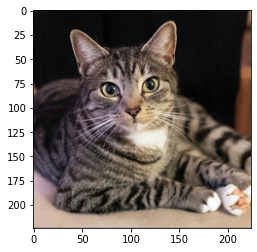

In [17]:
img = Image.open('cat2.jpg')
img2 = center_image(img)
plt.imshow(img2);

In [18]:
yhat = vgg16.predict(np.array(img2).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat) # 가장 높은 확률 5개 도출
label[0][0][1], label[0][0][2]

('Egyptian_cat', 0.7258704)

In [19]:
yhat = vgg19.predict(np.array(img2).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('tabby', 0.43770275)